In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [17]:
test_data = pd.read_csv("./data/test_format1.csv")
train_data = pd.read_csv("./data/train_format1.csv")

user_info = pd.read_csv("./data/user_info_format1.csv")
user_log = pd.read_csv("./data/user_log_format1.csv")

In [18]:
train_data.head(3)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


<AxesSubplot:xlabel='label', ylabel='count'>

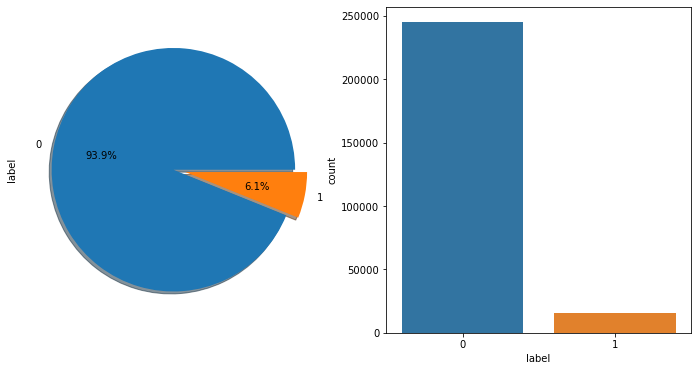

In [19]:
label_gp = train_data.groupby("label")["user_id"].count()
_, axe = plt.subplots(1, 2, figsize=(12, 6))
train_data.label.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0, 0.1], ax=axe[0])
sns.countplot('label', data=train_data, ax=axe[1])

TOP5 merchant
merchant	times
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


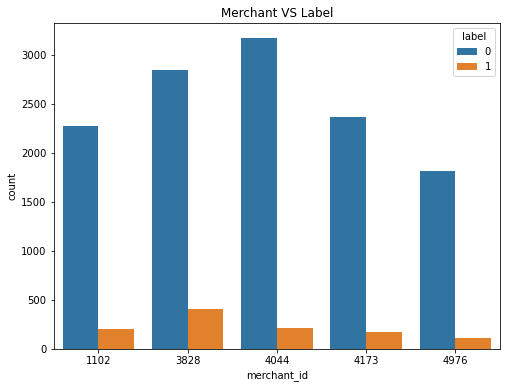

In [20]:
print('TOP5 merchant\nmerchant\ttimes')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044, 3828, 4173, 1102, 4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5']==1]
plt.figure(figsize=(8, 6))
plt.title('Merchant VS Label')
sax = sns.countplot('merchant_id', hue='label', data=train_data_merchant)

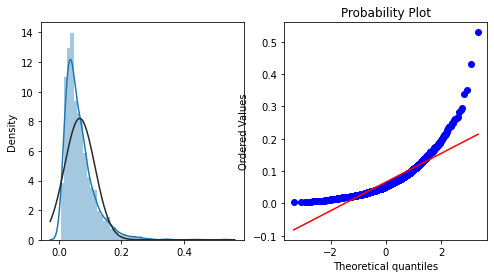

In [21]:
merchant_repeat_buy = [rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0]
plt.figure(figsize=(8, 4))

ax = plt.subplot(1, 2, 1)
sns.distplot(merchant_repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(merchant_repeat_buy, plot=plt)

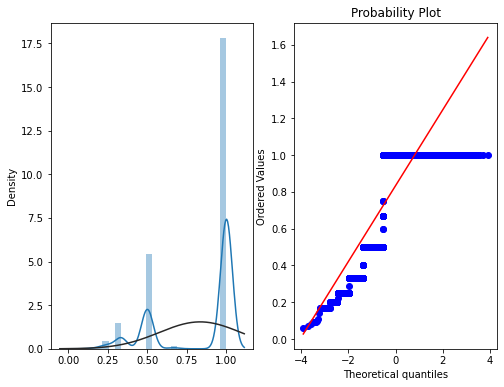

In [22]:
# 对用户分析
user_repeat_buy = [
    rate for rate in train_data.groupby(['user_id'])['label'].mean()
    if rate <= 1 and rate > 0
]

plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 2, 1)
sns.distplot(user_repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(user_repeat_buy, plot=plt)

165027
69787
6501
11387
3969
482


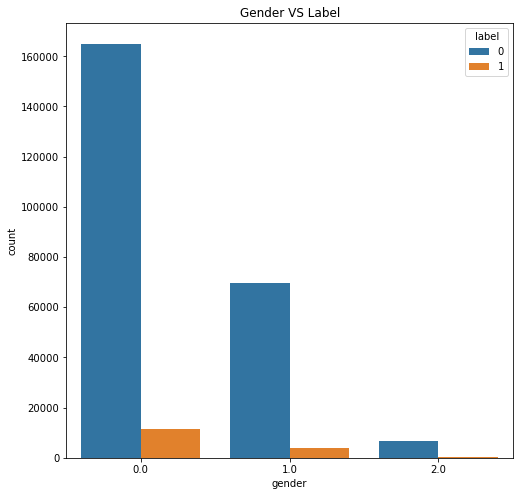

In [24]:
# 对用户性别的分析
train_data_user_info = train_data.merge(user_info, on=['user_id'], how='left')

plt.figure(figsize=(8, 8))
plt.title('Gender VS Label')
ax = sns.countplot('gender', hue='label', data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()
    # print(height)

[0.06454703141474033, 0.05381257118064971, 0.06902477445224116]


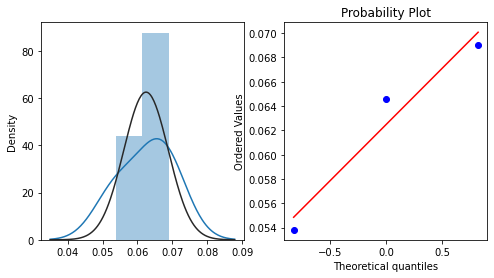

In [26]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()]
# print(repeat_buy)
plt.figure(figsize=(8, 4))

ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot=plt)


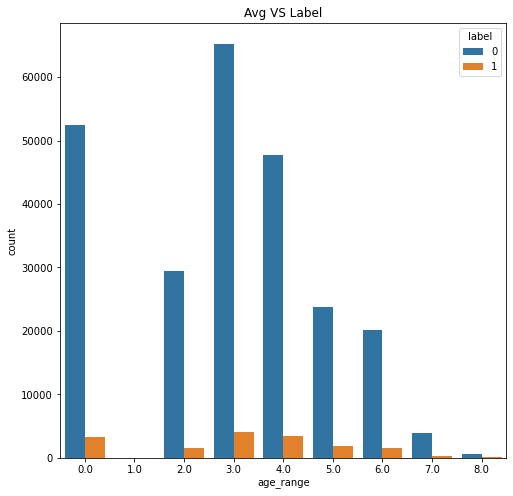

In [30]:
# 对用户年龄分析
plt.figure(figsize=(8, 8))
plt.title('Avg VS Label')
ax = sns.countplot('age_range', hue='label', data=train_data_user_info)

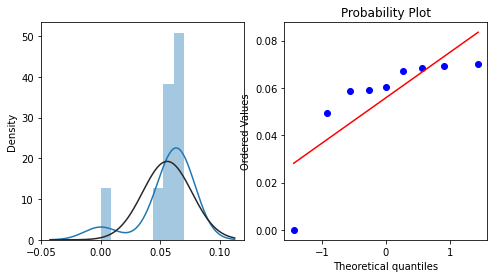

In [31]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()]

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
sns.distplot(repeat_buy, fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(repeat_buy, plot=plt)